In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('beer.csv')

In [5]:
df.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [6]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['calories','sodium','alcohol', 'cost']])

In [12]:
cluster_range = range(1, 10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters, random_state=101)
    clusters.fit(scaled_df)
    cluster_errors.append(clusters.inertia_)

C:\Users\91994\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


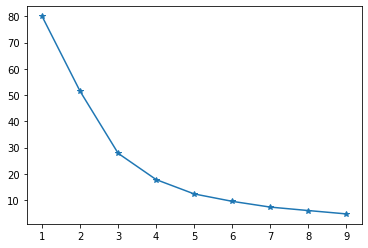

In [17]:
plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_errors, marker = '*');

In [18]:
k = 3
clusters = KMeans(n_clusters=k, random_state = 101)
clusters.fit(scaled_df)
df['clusterid'] = clusters.labels_

In [80]:
#cluster 0

df[df['clusterid'] == 0]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,0
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


In [81]:
#cluster 1

df[df['clusterid'] == 1]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


In [82]:
#cluster 2

df[df['clusterid'] == 2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2
